In this notebook, we will be plotting the performance of RefCM across all currently available datasets, as well as testing what parameters yield the best performance.

In [1]:
import sys
sys.path.append('../src/')

import os
import json
import numpy as np
import scanpy as sc

/opt/homebrew/anaconda3/envs/refcm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Seed set to 0


# Manual clustering
We show an example of manual iterative Leiden clustering that we performed in order to evaluate RefCM, CIPR, and ClustifyR as reference mapping methods, and not just reference cluster mapping methods.

We show this process for the MTG dataset; clustering on the other datasets was performed the same way and the clusterings were saved under `/fig2/leiden.json`.

In [179]:
if os.path.exists('fig2/leiden.json'):
    with open('fig2/leiden.json') as f:
        leiden_clusters = json.load(f)
else:
    leiden_clusters = {}

In [192]:
ds = sc.read_h5ad('../data/MTG.h5ad')

sums = ds.X.sum(axis=1).reshape((-1, 1))
ds.X = np.log1p(1e4 * ds.X / sums)

sc.pp.pca(ds)
sc.pp.neighbors(ds)
sc.tl.umap(ds)

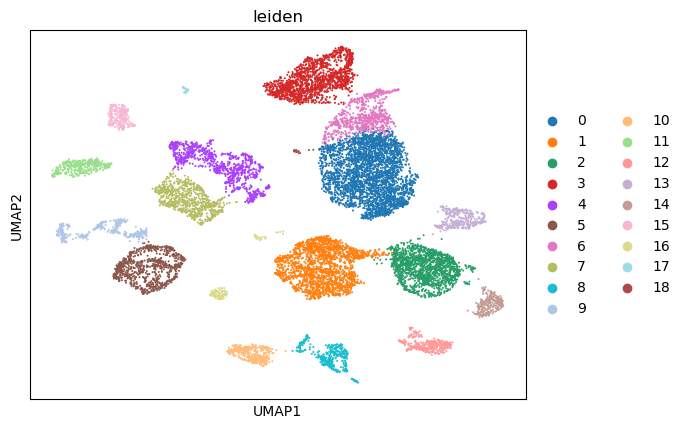

In [193]:
# try out different resolutions, see which produce sensical coarse results
sc.tl.leiden(ds, resolution=0.3)
sc.pl.umap(ds, color=['leiden'])

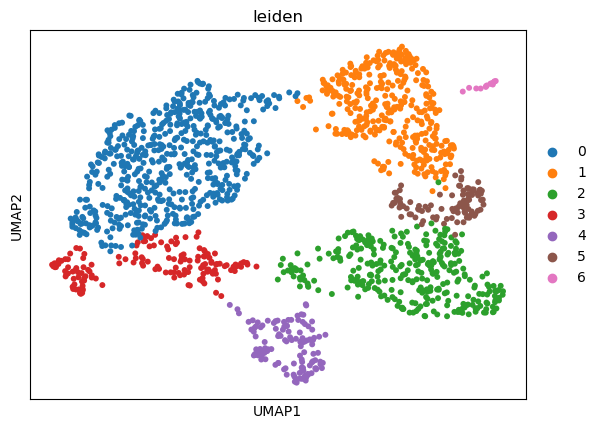

In [195]:
# narrow in on clusters to see if they ought to be subdivided again
d = ds[(ds.obs.leiden == '4') | (ds.obs.leiden == '7')].copy()
d.uns.pop('leiden_colors')

sc.pp.pca(d)
sc.pp.neighbors(d)
sc.tl.umap(d)
sc.tl.leiden(d, resolution=0.33)
sc.pl.umap(d, color=['leiden'])

In [196]:
# update original clustering
ds.obs.leiden = ds.obs.leiden.astype('str')
ds.obs.loc[d[d.obs.leiden == '0'].obs.index, 'leiden'] = '4'
ds.obs.loc[d[d.obs.leiden == '1'].obs.index, 'leiden'] = '7'
ds.obs.loc[d[d.obs.leiden == '2'].obs.index, 'leiden'] = '19'
ds.obs.loc[d[d.obs.leiden == '3'].obs.index, 'leiden'] = '20'
ds.obs.loc[d[d.obs.leiden == '4'].obs.index, 'leiden'] = '21'
ds.obs.loc[d[d.obs.leiden == '5'].obs.index, 'leiden'] = '22'
ds.obs.loc[d[d.obs.leiden == '6'].obs.index, 'leiden'] = '23'

... storing 'leiden' as categorical


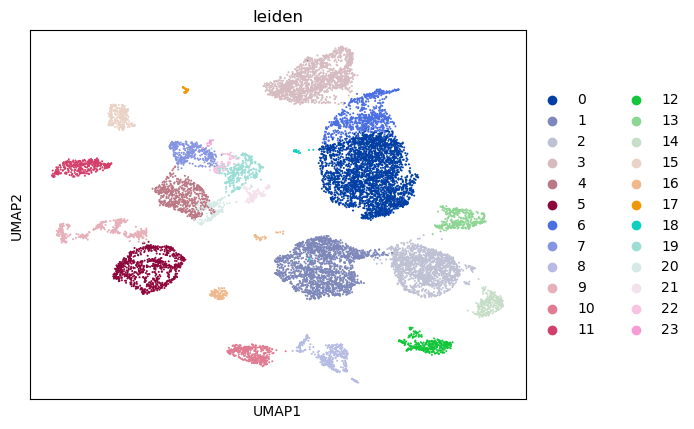

In [197]:
# review again
sc.pl.umap(ds, color=['leiden'])

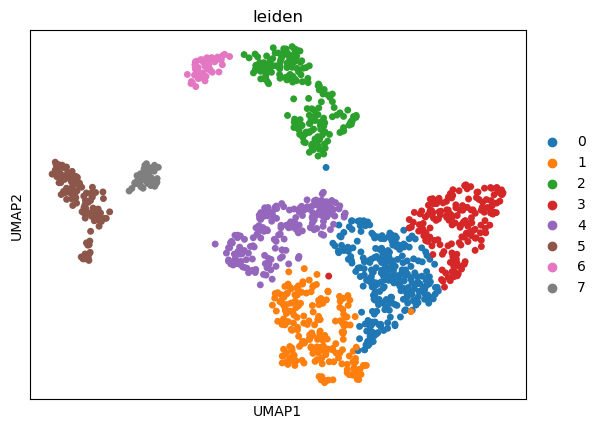

In [198]:
# narrow in on clusters to see if they ought to be subdivided again
d = ds[(ds.obs.leiden == '5') | (ds.obs.leiden == '9')].copy()
d.uns.pop('leiden_colors')
sc.pp.pca(d)
sc.pp.neighbors(d)
sc.tl.umap(d)

sc.tl.leiden(d, resolution=0.37)
sc.pl.umap(d, color=['leiden'])

In [199]:
# update original clustering
ds.obs.leiden = ds.obs.leiden.astype('str')
ds.obs.loc[d[d.obs.leiden == '0'].obs.index, 'leiden'] = '5'
ds.obs.loc[d[d.obs.leiden == '1'].obs.index, 'leiden'] = '9'
ds.obs.loc[d[d.obs.leiden == '2'].obs.index, 'leiden'] = '24'
ds.obs.loc[d[d.obs.leiden == '3'].obs.index, 'leiden'] = '25'
ds.obs.loc[d[d.obs.leiden == '4'].obs.index, 'leiden'] = '26'
ds.obs.loc[d[d.obs.leiden == '5'].obs.index, 'leiden'] = '27'
ds.obs.loc[d[d.obs.leiden == '6'].obs.index, 'leiden'] = '28'
ds.obs.loc[d[d.obs.leiden == '7'].obs.index, 'leiden'] = '29'

... storing 'leiden' as categorical


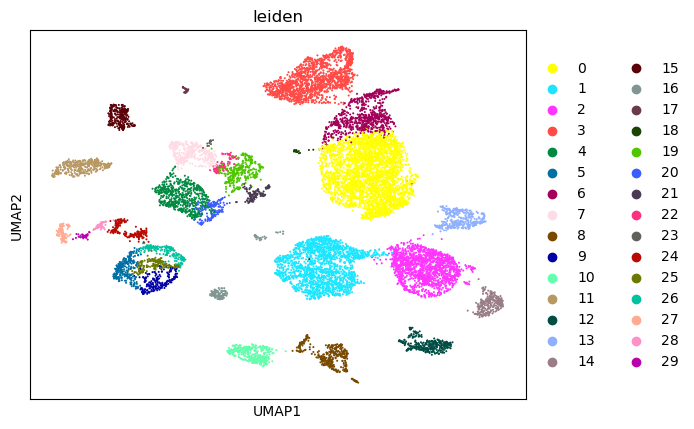

In [200]:
# review again
sc.pl.umap(ds, color=['leiden'])

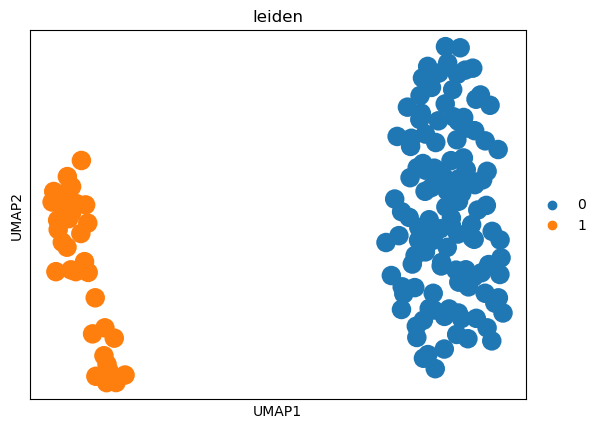

In [202]:
# narrow in again
d = ds[(ds.obs.leiden == '16')].copy()
d.uns.pop('leiden_colors')
sc.pp.pca(d)
sc.pp.neighbors(d)
sc.tl.umap(d)

sc.tl.leiden(d, resolution=0.5)
sc.pl.umap(d, color=['leiden'])

In [203]:
# update original clustering
ds.obs.leiden = ds.obs.leiden.astype('str')
ds.obs.loc[d[d.obs.leiden == '0'].obs.index, 'leiden'] = '30'
ds.obs.loc[d[d.obs.leiden == '1'].obs.index, 'leiden'] = '31'

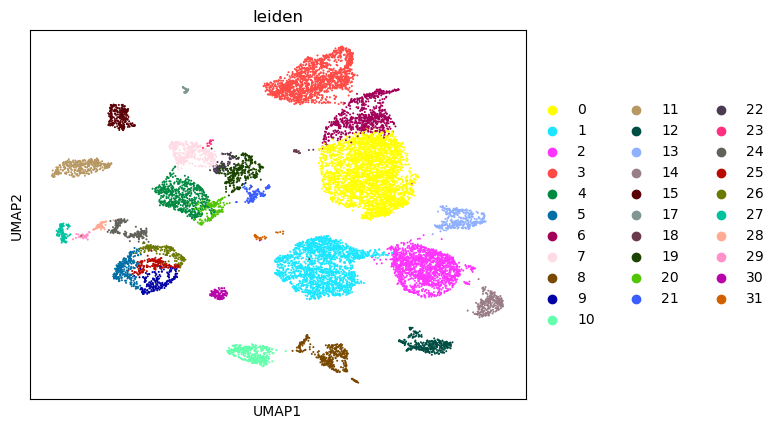

In [205]:
# review again
sc.pl.umap(ds, color=['leiden'])

In [206]:
leiden_clusters |= {'MTG': ds.obs.leiden.astype(int).tolist()}

with open('fig2/leiden.json', 'w') as f:
    json.dump(leiden_clusters, f)